# NYSE S&P500 Stock Outsatnding - Decision Tree and Feature Importance
### Group 10: Yi Yin (Ian) Chen/Priyanka Malhotra/Sushma Niveni Pindiga

### Part 1

### a.	Load the data and drop 'Ticker Symbol’, ‘Period Ending’, ‘For Year'
### a.	Drop NA


In [53]:
## Import Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
## Load data and clean

df = pd.read_csv('fundamentals.csv')

In [18]:
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [20]:
df.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [21]:
df.drop(columns=['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'For Year'], inplace=True)

In [22]:
# Drop NA
df.dropna(inplace=True)

### b.     Split data set with 70% train and 30% test then build random forest model.  Default every (hyper-)parameter then compute MSE. (15 pts)

In [25]:
# Split and isolate x and y

np.random.seed(seed=5566)

X = df.drop('Estimated Shares Outstanding', axis = 1)

y = df['Estimated Shares Outstanding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5566)

In [26]:
## Build RF model
rf_model = RandomForestRegressor(random_state=5566)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=5566)

In [27]:
# Predict and compute MSE
y_predict = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_predict)

print(f"RF MSE = {mse_rf}")

RF MSE = 1.3277503451040698e+17


### c.     Build random forest with min_samples_split set to 3.  Compare with random forest model in (b).  Explain. (15 pts)

In [28]:
## Build model and tune min_samples_spit = 3
rf_model_min_samples_split = RandomForestRegressor(min_samples_split=3, random_state=5566)
rf_model_min_samples_split.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=3, random_state=5566)

In [30]:
# Predict, compute MSE and compare with default model
y_predict_min = rf_model_min_samples_split.predict(X_test)
mse_rf_min = mean_squared_error(y_test, y_predict_min)

print(f"RF MSE min 3 = {mse_rf_min}")

RF MSE min 3 = 1.322341547751116e+17


### Insight

- When controlling the minimum of samples in a node to 3, we observed a decrease in MSE

- This means the controlled model has a better performance than the default model

- This may be due to not exhausting to the last depth, thus slightly avoiding overfitting

### d.     Use "Mean Decrease in Impurity" and "Permutation Feature Importance" to compute the variable importance of the random forest in (c).  Explain how each method computes the variable importance and compare their results. (15 pts)

In [31]:
# Mean Decrease in Impurity

mdi = rf_model_min_samples_split.feature_importances_

In [33]:
# Permutation Feature Importance

result = permutation_importance(rf_model_min_samples_split, X_test, y_test, n_repeats=100, random_state=5566)
pfi = result.importances_mean

In [37]:
# compare results
df_compare = pd.DataFrame({
    'MDI': mdi,
    'PFI': pfi
}, index=X.columns)
print(df_compare)

                                 MDI       PFI
Accounts Payable            0.001241 -0.000661
Accounts Receivable         0.000861 -0.000455
Add'l income/expense items  0.004203 -0.000050
After Tax ROE               0.000523  0.000069
Capital Expenditures        0.002115 -0.000005
...                              ...       ...
Total Liabilities           0.001687  0.001256
Total Liabilities & Equity  0.056830  0.010167
Total Revenue               0.001653  0.000981
Treasury Stock              0.001953  0.001441
Earnings Per Share          0.033671  0.068581

[74 rows x 2 columns]


### Explain

- MDI calculates the reduction of deviance of each variable in each tree, and sums the total deviance reduction for each variable to define feature importance

- PFI shuffles one variable at a time, and compares the total deviance before and after shuffle. Does this for each variable. The higher the difference in the deviance, the more important the feature is.

### e.     Use the same split to build lasso regression.  Compare with last model (c). (15 pts)

In [42]:
# Lasso
lasso = Lasso(random_state=5566, max_iter=100000)
lasso.fit(X_train, y_train)

/Users/ianchen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.318e+19, tolerance: 9.622e+16
  model = cd_fast.enet_coordinate_descent(


Lasso(max_iter=100000, random_state=5566)

In [44]:
# Predict & MSE
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso MSE: {mse_lasso}")
print(f"RF MSE min 3 = {mse_rf_min}")

Lasso MSE: 2.8712307631154912e+17
RF MSE min 3 = 1.322341547751116e+17


### Compare

- The rf model had better performance of OOS prediction

### Part 2

### a.     Use the breast cancer dataset to build decision tree classifier to predict the diagnosis.  Split the data into 70% train and 30% test. (10 pts) (Default every parameter)

In [58]:
# Read data, split and build tree
df_cancer = pd.read_csv('breast_cancer.csv')

In [59]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [60]:
df_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [61]:
df_cancer.drop('Unnamed: 32', axis=1, inplace=True)
df_cancer['diagnosis'] = df_cancer['diagnosis'].replace({'M': 1, 'B': 0})

In [62]:
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5566)

In [63]:
tree = DecisionTreeClassifier(random_state=5566)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=5566)

### b.     Print Confusion matrix and explain.  Hint:  A confusion matrix is a table used in machine learning to visualize the performance of a classification model by showing the actual vs. predicted values, helping to identify the types of errors made by the model.  Typically, the actual labels are on the vertical axis (rows), and the predicted labels are on the horizontal axis (columns). (10 pts)

In [65]:
# Predict and plot confusion matrix

y_pred_tree = tree.predict(X_test)
cm_tree = confusion_matrix(y_test,y_pred_tree)

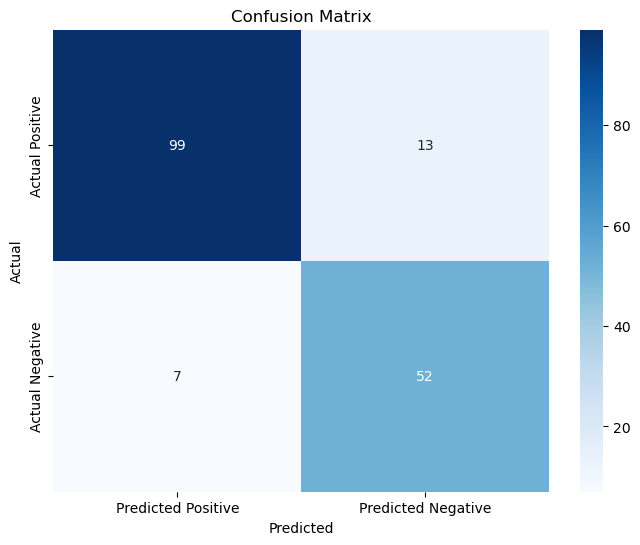

In [67]:
# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Insight

- FP = 7 (Type I error)
- FN = 13 (Type II error)
- TP = 99
- TN = 52

### c.     Visualize the tree.  What variables are in the plot? (10 pts)

In [75]:
feature_names = X.columns.tolist()
class_names = ['0','1']

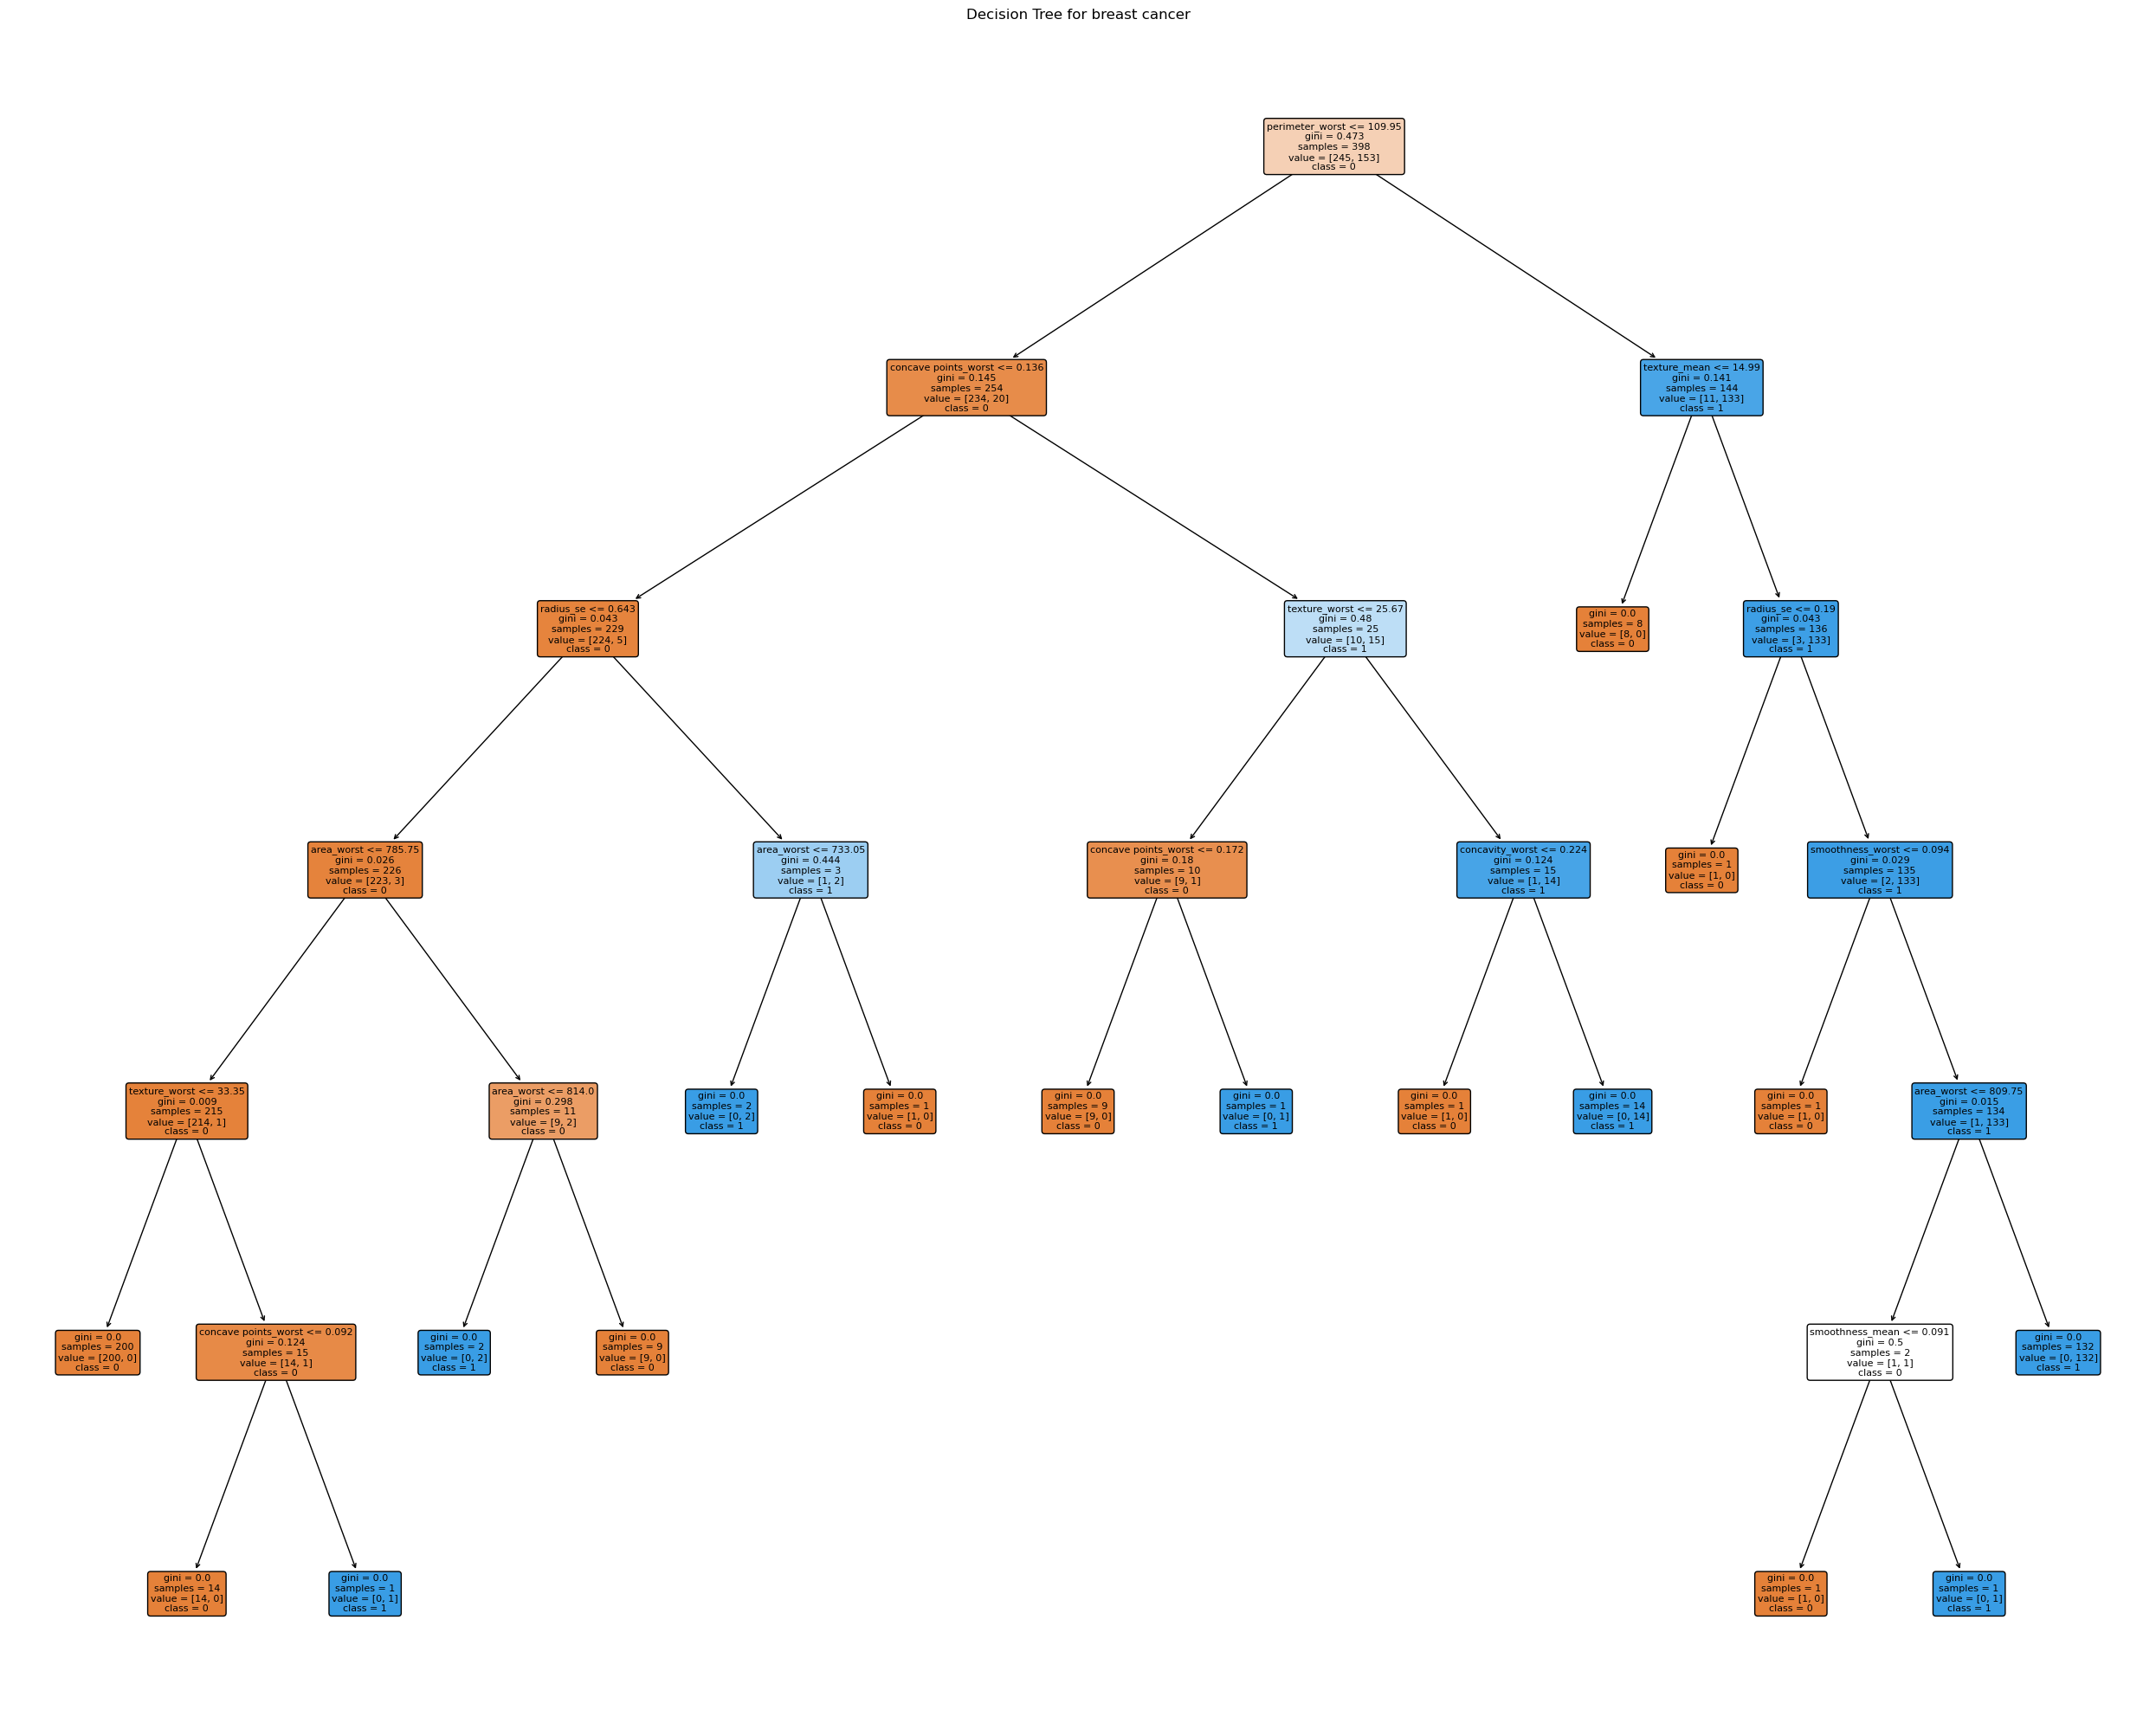

In [76]:
# Plot the decision tree
plt.figure(figsize=(25, 20))

plot_tree(tree, filled=True, feature_names=feature_names, class_names=class_names, rounded=True,fontsize=8)
plt.title("Decision Tree for breast cancer")

# Display the plots
plt.tight_layout()
plt.show()

#### **Variables: perimeter_worst, concave points_worst, texture_mean, radius_se, texture_worst, area_worst, concavity_worst, smoothness_worst, smoothness_mean**

### d.     No code required:  would you consider pruning this tree?  Why?  Where?  Explain how you would go about deciding where to prune the tree?  What measures would you use? (10 pts)

### Explain

- Yes, I would consider pruning, the depth of the tree is too deep

- Some of the leaf nodes sample size is small, this indicates overfitting

- I would start by pruning the leaf nodes that are deeper and with smaller sample sizes (for example sample size smaller than 5)

- I would test out by setting maximum depth, minimum samples per leaf and minimum samples per split

- We could also remove the split that contrivutes leat to deviance reduction.

- Use CV to choose from candidate trees